In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

from enfify.cnn_classification import cnn_classifier
from enfify.config import MODELS_DIR, PROCESSED_DATA_DIR, FIGURES_DIR

In [3]:
SEED = 0
TEST_SIZE = 0.2

In [6]:
model_path = MODELS_DIR / "onedcnn_model_alldata_86.pth"

files_carioca1 = sorted((PROCESSED_DATA_DIR / "Carioca1").glob("*.npy"))
test_files_carioca1 = train_test_split(files_carioca1, test_size=TEST_SIZE, random_state=SEED, shuffle=True)[1]
# dset_carioca1 = np.stack([np.load(f)[40:40] for f in test_files_carioca1])
# labels_carioca1 = np.array(int("tamp" in f.name) for f in test_files_carioca1)

files_carioca2 = sorted((PROCESSED_DATA_DIR / "Carioca2").glob("*.npy"))
test_files_carioca2 = train_test_split(files_carioca2, test_size=TEST_SIZE, random_state=SEED, shuffle=True)[1]
# dset_carioca2 = np.stack([np.load(f)[40:40] for f in test_files_carioca2])
# labels_carioca2 = np.array(int("tamp" in f.name) for f in test_files_carioca2)

files_synthetic = sorted((PROCESSED_DATA_DIR / "Synthetic").glob("*.npy"))
test_files_synthetic = train_test_split(files_synthetic, test_size=TEST_SIZE, random_state=SEED, shuffle=True)[1]
# dset_synthetic = np.stack([np.load(f)[40:40] for f in test_files_synthetic])
# labels_synthetic = np.array(int("tamp" in f.name) for f in test_files_synthetic)

files_whuref = sorted((PROCESSED_DATA_DIR / "WHU_ref").glob("*.npy"))
test_files_whuref = train_test_split(files_whuref, test_size=TEST_SIZE, random_state=SEED, shuffle=True)[1]
# dset_whuref = np.stack([np.load(f)[40:40] for f in test_files_whuref])
# labels_whuref = np.array(int("tamp" in f.name) for f in test_files_whuref)

In [ ]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2)

100%|██████████| 400/400 [00:01<00:00, 345.45it/s, Carioca1]


Confusion Matrix:
[[189   7]
 [ 32 172]]
Test Accuracy: 0.9025


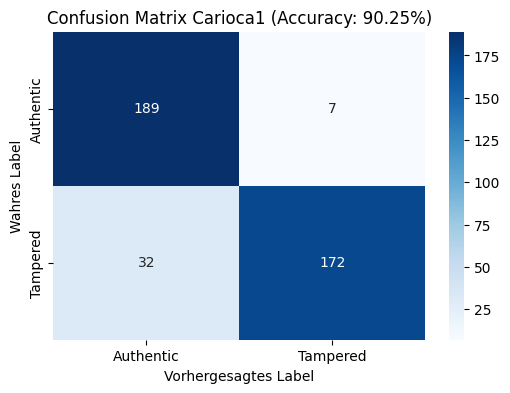

In [9]:
predictions_carioca1 = []
confidences_carioca1 = []
labels_carioca1 = []
for file in tqdm(test_files_carioca1, postfix="Carioca1"):
    label = int("tamp" in file.name)
    feature_freq = np.load(file)
    feature_freq = feature_freq[40:-40]
    pedicted_class, confidence = cnn_classifier(model_path, feature_freq)
    labels_carioca1.append(label)
    predictions_carioca1.append(pedicted_class)
    confidences_carioca1.append(confidence)

cm_carioca1 = confusion_matrix(labels_carioca1, predictions_carioca1)
accuracy_carioca1 = accuracy_score(labels_carioca1, predictions_carioca1)

print("Confusion Matrix:")
print(cm_carioca1)
accuracy = accuracy_score(labels_carioca1, predictions_carioca1)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_carioca1,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=["Authentic", "Tampered"],
    yticklabels=["Authentic", "Tampered"],
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix CNN Carioca1 (Accuracy: {accuracy*100:.2f}%)")
plt.savefig(FIGURES_DIR / f"cm_cnn_carioca1.pdf", dpi=300)
plt.show()

100%|██████████| 400/400 [00:01<00:00, 339.24it/s, Carioca2]


Confusion Matrix:
[[187   9]
 [ 56 148]]
Test Accuracy: 0.8375


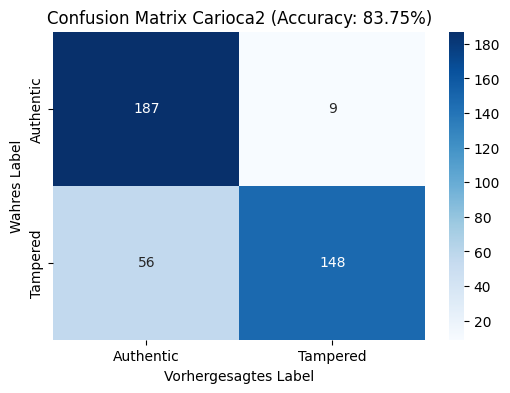

In [11]:
predictions_carioca2 = []
confidences_carioca2 = []
labels_carioca2 = []
for file in tqdm(test_files_carioca2, postfix="Carioca2"):
    label = int("tamp" in file.name)
    feature_freq = np.load(file)
    feature_freq = feature_freq[40:-40]
    pedicted_class, confidence = cnn_classifier(model_path, feature_freq)
    labels_carioca2.append(label)
    predictions_carioca2.append(pedicted_class)
    confidences_carioca2.append(confidence)

cm_carioca2 = confusion_matrix(labels_carioca2, predictions_carioca2)
accuracy_carioca2 = accuracy_score(labels_carioca2, predictions_carioca2)

print("Confusion Matrix:")
print(cm_carioca2)
accuracy = accuracy_score(labels_carioca2, predictions_carioca2)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_carioca2,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=["Authentic", "Tampered"],
    yticklabels=["Authentic", "Tampered"],
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix CNN Carioca2 (Accuracy: {accuracy*100:.2f}%)")
plt.savefig(FIGURES_DIR / f"cm_cnn_carioca2.pdf", dpi=300)
plt.show()


100%|██████████| 800/800 [00:02<00:00, 341.89it/s, Synthetic]


Confusion Matrix:
[[399   9]
 [ 75 317]]
Test Accuracy: 0.8950


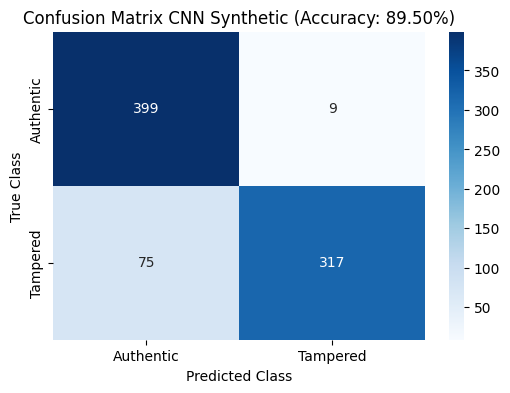

In [12]:
predicted_synthetic = []
confidences_synthetic = []
labels_synthetic = []
for file in tqdm(test_files_synthetic, postfix="Synthetic"):
    label = int("tamp" in file.name)
    feature_freq = np.load(file)
    feature_freq = feature_freq[40:-40]
    pedicted_class, confidence = cnn_classifier(model_path, feature_freq)
    labels_synthetic.append(label)
    predicted_synthetic.append(pedicted_class)
    confidences_synthetic.append(confidence)

cm_synthetic = confusion_matrix(labels_synthetic, predicted_synthetic)
accuracy_synthetic = accuracy_score(labels_synthetic, predicted_synthetic)

print("Confusion Matrix:")
print(cm_synthetic)
accuracy = accuracy_score(labels_synthetic, predicted_synthetic)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_synthetic,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=["Authentic", "Tampered"],
    yticklabels=["Authentic", "Tampered"],
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix CNN Synthetic (Accuracy: {accuracy*100:.2f}%)")
plt.savefig(FIGURES_DIR / f"cm_cnn_synthetic.pdf", dpi=300)
plt.show()


100%|██████████| 800/800 [00:02<00:00, 341.04it/s, WHU Ref]


Confusion Matrix:
[[402   6]
 [ 49 343]]
Test Accuracy: 0.9313


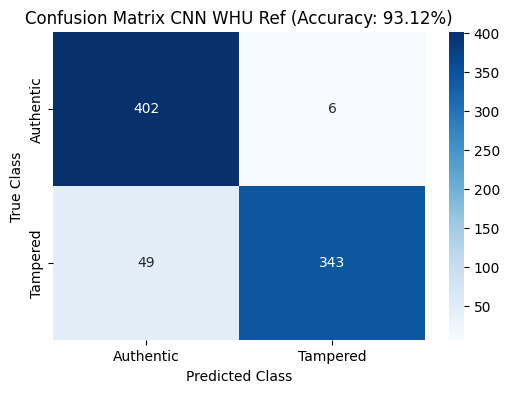

In [13]:
predicted_whuref = []
confidences_whuref = []
labels_whuref = []
for file in tqdm(test_files_whuref, postfix="WHU Ref"):
    label = int("tamp" in file.name)
    feature_freq = np.load(file)
    feature_freq = feature_freq[40:-40]
    pedicted_class, confidence = cnn_classifier(model_path, feature_freq)
    labels_whuref.append(label)
    predicted_whuref.append(pedicted_class)
    confidences_whuref.append(confidence)

cm_whuref = confusion_matrix(labels_whuref, predicted_whuref)
accuracy_whuref = accuracy_score(labels_whuref, predicted_whuref)

print("Confusion Matrix:")
print(cm_whuref)
accuracy = accuracy_score(labels_whuref, predicted_whuref)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_whuref,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    xticklabels=["Authentic", "Tampered"],
    yticklabels=["Authentic", "Tampered"],
)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix CNN WHU Ref (Accuracy: {accuracy*100:.2f}%)")
plt.savefig(FIGURES_DIR / f"cm_cnn_whuref.pdf", dpi=300)
plt.show()
